In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


In [2]:
df = pd.read_excel("data/CUSTOMER_BUSINESS_REVIEW_Jan-June.xlsx")
df.head()

,FILE NO,REPORT DATE,DATE OPENED,Month,Year,DIVISION,BUSINESS LINE,SALESMAN CODE,SALESMAN NAME,METHOD OF TRANSPORT,...,CUSTOMER CITY,SHIPPER NAME,CONSIGNEE NAME,GROSS WEIGHT,REVENUE,EXPENSE,PROFIT,DUTY BILLED,TOTAL BILLED TO ACCOUNT,Rev. Less Duties
0,10-000021,2020-05-19,2020-05-19,May,2020,10,65.0,NaN,NaN,WH,...,NaN,NaN,NaN,0.000,0.00,0.00,0.00,0.0,0.00,0.00
1,1114983-01,2020-01-13,2019-11-18,Jan,2020,10,15.0,28.0,JODI O,OE,...,HAMBURG,WEB INDUSTRIES INC.,WEB INDUSTRIES STADE GMBH,9923.000,2279.90,1177.36,1102.54,0.0,2279.90,2279.90
2,1114998-01,2020-01-02,2019-11-27,Jan,2020,10,15.0,5.0,JOE WYSON/HOUSE,OE,...,FREMONT,ELECTRONICS FOR IMAGING INC,BEITH DIGITAL PTY LTD,3659.620,4213.73,3646.01,567.72,0.0,4213.73,4213.73
3,1115009-01,2020-02-01,2019-12-06,Feb,2020,10,15.0,28.0,JODI O,OE,...,HAMBURG,WEB INDUSTRIES INC.,WEB INDUSTRIES STADE GMBH,10031.751,2279.90,1177.36,1102.54,0.0,2279.90,2279.90
4,1115012-01,2020-01-06,2019-12-09,Jan,2020,10,15.0,28.0,JODI O,OE,...,DAYVILLE,WEB INDUSTRIES INC.,COMMSCOPE SOLUTIONS IRELAND,15891.000,3862.50,3145.54,716.96,0.0,3862.50,3862.50


In [3]:
df['REPORT DATE'].min(), df['REPORT DATE'].max()


(Timestamp('2020-01-01 00:00:00'), Timestamp('2020-06-30 00:00:00'))

In [4]:
cols = ['DATE OPENED', 'FILE NO', 'CUSTOMER CITY', 'SHIPPER NAME', 'CONSIGNEE NAME', 'GROSS WEIGHT',
        'DUTY BILLED', 'TOTAL BILLED TO ACCOUNT', 'Rev. Less Duties']

df.drop(cols, axis=1, inplace=True)
df = df.sort_values('REPORT DATE')
df.to_excel('data/Cleaned_Customer_Business_Review_Jan-Jun2020.xlsx')

df.isnull().sum()

REPORT DATE              0
Month                    0
Year                     0
DIVISION                 0
BUSINESS LINE           13
SALESMAN CODE          808
SALESMAN NAME          808
METHOD OF TRANSPORT      0
CUSTOMER NAME           22
REVENUE                  0
EXPENSE                  0
PROFIT                   0
dtype: int64

In [5]:
cleaned_df = df.groupby('REPORT DATE')['REVENUE'].sum().reset_index()
cleaned_df = cleaned_df.set_index('REPORT DATE')

y = cleaned_df['REVENUE'].resample('MS').mean()
y['2020':]

REPORT DATE
2020-01-01    210583.933226
2020-02-01    189394.601724
2020-03-01    151527.746129
2020-04-01    150637.294667
2020-05-01    187514.834194
2020-06-01    189513.549000
Freq: MS, Name: REVENUE, dtype: float64

### Visualizing Sales Revenue Time Series Data

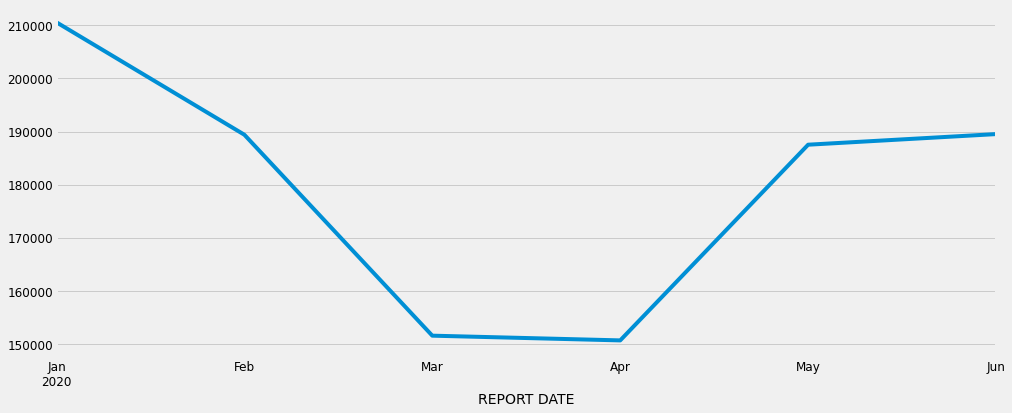

In [6]:
y.plot(figsize=(15, 6))
plt.show()

In [7]:
sales_reps = ('AGENTS', 'AP Vendor', 'Elaine Dresios', 'Internal',
              'J HLUDIK Reassigned', 'JLeVATO AGENTS', 'MOLIVEIRA',
              'Oceanair - California', 'PATTY MARCO', 'PERISHABLES',
              'TDOONER', 'UNASSIGNED')

comm_reps = ('JOE WYSON/HOUSE', "KL'HEUREUX", 'JODI O', 'ED KAPLAN/HOUSE', 'VALERIE KOEN',
             'PDAVIS', 'JOSEPHINE LEVATO', 'PDAVIS - PW REASSIGNED', 'JOLSON - REASSIGNED',
             'TSIROGIANIS - PW REASSIGNED', 'Justin Andrews', 'GEORGE T.', 'JOLSON - PW REASSIGNED',
             'Christine Roderick', "KL'HEUREUX - PW REASSIGNED", 'MA REP', 'VALERIE KOEN - REASSIGNED',
             'MA REP - REASSIGNED')

